In [2]:
# L2 ADVERSARIAL PLOTS

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # make plots bigger
import numpy as np

In [3]:
# load in the .npz files containing the adversarial distances
data1 = np.load('../cifar10/pgd_attack_baseline/attack_baseline/pgd_dists.npz')['l2']
data2 = np.load('../cifar10/pgd_attack/attack_unregularized/pgd_dists.npz')['l2']
data3 = np.load('../cifar10/pgd_attack/attack_regularized/pgd_dists.npz')['l2']

In [4]:
# only keep strictly positive distances (ignore abstained attacks or images already misclassified)
data1 = data1[data1>0]
data2 = data2[data2>0]
data3 = data3[data3>0]

In [5]:
# make cdf (increasing) data
x_axis = np.linspace(0,max([max(data1).item(), max(data2).item(), max(data3).item()]), 1000)
data1_cdf = [(data1<x_axis[i]).sum().item()/len(data1) for i in range(1000)]
data2_cdf = [(data2<x_axis[i]).sum().item()/len(data2) for i in range(1000)]
data3_cdf = [(data3<x_axis[i]).sum().item()/len(data3) for i in range(1000)]

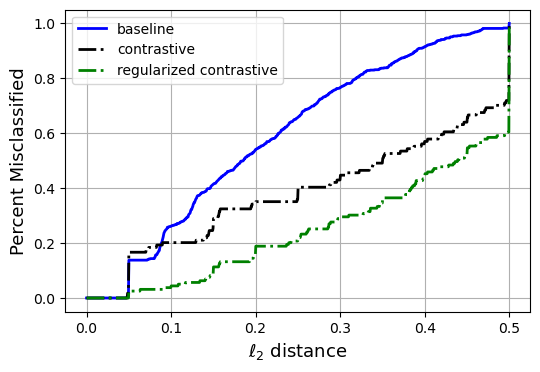

In [6]:
plt.plot(x_axis, data1_cdf, 'b-', label="baseline", linewidth=2)
plt.plot(x_axis, data2_cdf, 'k-.', label="contrastive", linewidth=2)
plt.plot(x_axis, data3_cdf, 'g-.', label="regularized contrastive", linewidth=2)
#plt.xscale('log')
plt.grid(True)
plt.legend(prop={'size': 10})
plt.xlabel("$\ell_2$ distance", fontsize=13)
plt.ylabel("Percent Misclassified", fontsize=13)
plt.savefig('./figures/baseline_contrastive_contrastive_tik',bbox_inches='tight')
plt.show()